# Домашее задание №2

## Задание
Откройте файл с информацией о мобильных приложениях из Apple Store "AppleStore.csv".

В нём содержаться следующие переменные:

    - "n": номер приложения
    - "id" : идентификатор приложения
    - "track_name": название приложения
    - "size_bytes": размер в байтах
    - "currency": тип валюты, в которой измеряется цена
    - "price": цена
    - "rating_count_tot": суммарное число оценок пользователей (для всех версий)
    - "rating_count_ver": суммарное число оценок пользователей (для текущей версии)
    - "user_rating" : средняя оценка пользователей (для всех версий)
    - "user_rating_ver": средняя оценка пользователей (для текущей версии)
    - "ver": код последней версии
    - "cont_rating": возрастное ограничение контента
    - "prime_genre": основной жанр
    - "sup_devices.num": количество поддерживающих устройств
    - "ipadSc_urls.num": количество скриншотов в описании
    - "lang.num": число поддерживаемых языков
    - "vpp_lic": лицензирование на основе устройства Vpp


Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

## Выполните предложенные задания. Для каждого задания постройте графики, визуализирующие анализируемые взаимосвязи.

### Задание 1. Проверка отличия распределения от «нормального»

Проанализируйте распределение значений всех метрических переменных. Проведите тест для проверки того отличается ли распределение значений переменных от нормального распределения. Сформулируйте гипотезы и выводы по результатам анализа. Постройте гистограммы распределения с наложенной кривой нормального распределения.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Latex
from sympy import latex
from scipy import stats


# Загрузка данных
data = pd.read_csv('AppleStore.csv')

# Перечень метрических переменных
numeric_variables = ["size_bytes", "price", "rating_count_tot", "rating_count_ver",
                     "user_rating", "user_rating_ver", "sup_devices.num",
                     "ipadSc_urls.num", "lang.num"]

# Построение гистограмм распределения переменных
for var in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True, color='blue', label='Распределение', stat='density')
    plt.xlabel(var)
    plt.ylabel('Плотность')
    plt.title(f'Распределение {var}')
    # Наложение кривой нормального распределения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data[var].mean(), data[var].std())
    plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
    plt.legend()
    plt.show()

# Проведение теста Шапиро-Уилка для проверки нормальности
for x in numeric_variables:
    display(data[x].value_counts())
    stat, p_value = stats.kstest(data[x], 'norm', args=(data[x].mean(), data[x].std()))
    display(Latex(f'Тест\ {latex(x)}:\ stat={latex(stat)},\ p-value={latex(p_value)}'))
    print('\n')


FileNotFoundError: [Errno 2] No such file or directory: 'AppleStore (1).csv'

## Исходя из показателей теста Колмогорова-Смирнова, у всех переменных pvalue = 0. Значит, принимаем Н1(распределение сильно отличается от нормального). Однако это может быть обусловлено размерами выборки. Но если мы взглянем на графики и значения, которые нам выводит value_counts, мы можем заметить, что в действительности, в зависимости от переменной, наблюдается положительная или отрицательная ассиметрия буквально во всех переменных.

### Задание 2. Тест Хи-квадрат

Проведите тест Хи-квадрат c тремя разными парами переменных, для которых он применим. Можно использовать как исходные переменные, так и перекодировать их. Постройте для выбранных пар переменных таблицы сопряженности и прокомментируйте их. Сформулируйте гипотезы. Интерпретируйте результаты анализа. Обоснуйте свои выводы.

In [ ]:
from scipy.stats import chi2_contingency

# Пример пар переменных
pairs = [("cont_rating", "user_rating_ver"),
         ("cont_rating", "user_rating"),
         ("ipadSc_urls.num", "cont_rating")]
for pair in pairs:
    # Создание таблицы сопряженности
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])

    # Выполнение теста Хи-квадрат
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Вывод результатов
    display(Latex(f"Тест\ Хи-квадрат\ для\ переменных\ {latex(pair)}:"))
    display(Latex(f"Chi2:\ {latex(chi2_stat)}"))
    display(Latex(f"P-value:\ {latex(p_val)}"))
    print("")

    # Построение таблицы сопряженности
    display(Latex("Таблица\ сопряженности:"))
    display(contingency_table)
    print("------------------------------------------------------")


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

user_rating_ver,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
cont_rating,,,,,,,,,,
12+,233,9,13,25,31,38,94,204,363,145
17+,273,19,8,18,14,25,26,73,101,65
4+,807,91,52,88,114,205,332,746,1373,625
9+,130,6,1,5,17,36,81,214,368,129


------------------------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

user_rating,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
cont_rating,,,,,,,,,,
12+,151,3,9,18,25,57,102,247,453,90
17+,181,5,6,12,24,33,64,117,144,36
4+,496,34,40,72,132,253,457,1021,1648,280
9+,101,2,1,4,15,40,79,241,418,86


------------------------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

cont_rating,12+,17+,4+,9+
ipadSc_urls.num,,,,
0,209,270,803,105
1,29,15,94,17
2,17,10,115,14
3,40,19,191,36
4,117,80,436,77
5,743,228,2794,738


------------------------------------------------------


## Исходя из таблиц сопряженности, можно использовать тест Хи-квадрат для выбранного набора пар переменных, потому что 95% ячеек содержат ожидаемую частоту больше 5. Во всех трех случаях значение pvalue очень мало(гораздо меньше 0.05) , а значит, что наблюдается сильная статистическая связь между данными парами(гипотезы Н1 принимаются на уровне 1%). Значит, есть связь между рейтингом приложения(текущей версии или в общем) и возрастным ограничением,  а также между возрастным ограничением и количеством скриншотов в описании. Однако, определить связь или ее напрваление, используя только тест Хи-квадрат нельзя, поэтому никаких выводов сделать тоже не предоставляется возможным.

### Задание 3. Парная корреляция
Проведите корреляционный анализ переменных (нужно рассмотреть не менее трёх разных пар переменных). Обоснуйте выбор рассчитываемых коэффициентов корреляции. Сформулируйте гипотезы. Интерпретируйте результаты анализа (значимость, сила и направление взаимосвязи). Заполните таблицу (не менее 3 записей).

,Анализируемые пары переменных,Выбранный коэффициент корреляции (обоснование выбора),Гипотеза,Сила взаимосвязи,Направление взаимосвязи,Статистическая значимость взамосвязи
0,"size_bytes, price",Пирсона (обе переменные метрические),H1: Существует взаимосвязь между размером прил...,оч слабая,прямая(коэфф >0),"p-val < 0.05, гипотеза H1 подтвердилась"
1,"cont_rating, user_rating",Спирмен(порядковая и интервальная),H1: Существует взаимосвязь между возрастным ог...,оч слабая,прямая(коэфф >0),"p-val < 0.05, гипотеза H1 подтвердилась"
2,"ipadSc_urls.num, rating_count_tot",Пирсона (обе переменные метрические),H1: Существует взаимосвязь между количесвтом о...,оч слабая,прямая(коэфф >0),"p-val > 0.1, гипотеза H1 отвергается на уровне..."


<IPython.core.display.Latex object>

PearsonRResult(statistic=0.18239187109377158, pvalue=7.100531549372062e-55)

<IPython.core.display.Latex object>

SignificanceResult(statistic=0.0708657571007115, pvalue=1.76117908954743e-09)

<IPython.core.display.Latex object>

PearsonRResult(statistic=0.015734290510253768, pvalue=0.1819839164082032)

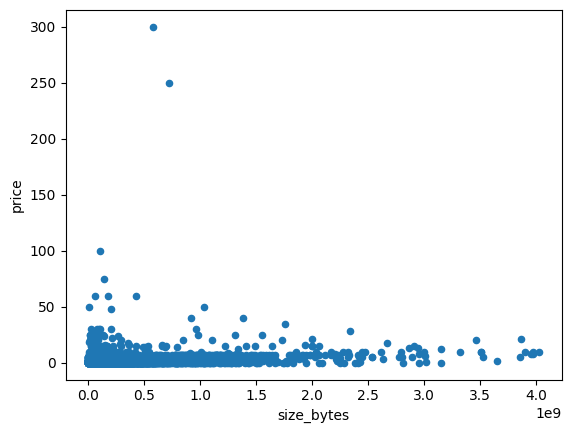

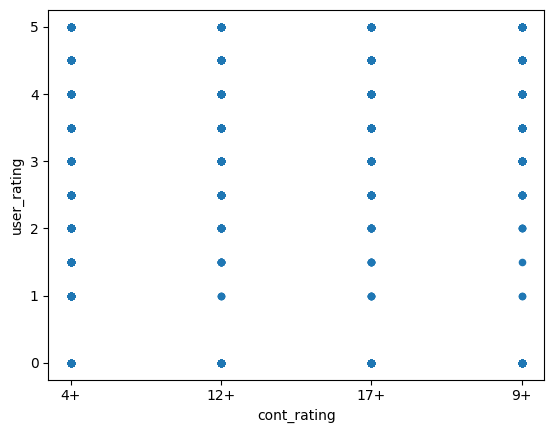

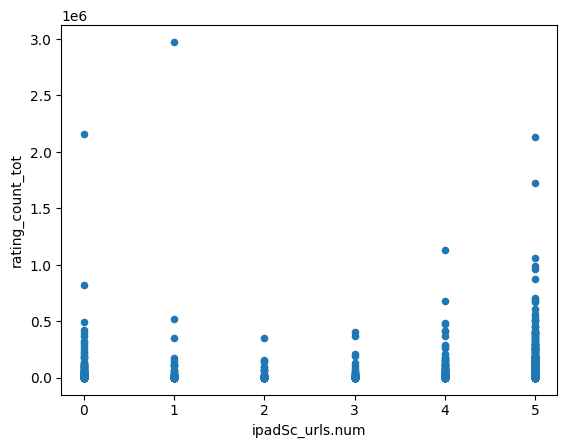

In [ ]:
d = {
     'Анализируемые пары переменных': ['size_bytes, price', 'cont_rating, user_rating', 'ipadSc_urls.num, rating_count_tot'],
     'Выбранный коэффициент корреляции (обоснование выбора)': ['Пирсона (обе переменные метрические)', 'Спирмен(порядковая и интервальная)', 'Пирсона (обе переменные метрические)'],
     'Гипотеза': ['H1: Существует взаимосвязь между размером приложения в байтах и его стоимостью',
                  'H1: Существует взаимосвязь между возрастным ограничением приложения и его рейтингом',
                  'H1: Существует взаимосвязь между количесвтом оценок приложения и его рейтингом'],
     'Сила взаимосвязи': ['оч слабая', 'оч слабая', 'оч слабая'],
     'Направление взаимосвязи': ['прямая(коэфф >0)', 'прямая(коэфф >0)', 'прямая(коэфф >0)'],
     'Статистическая значимость взамосвязи': ['p-val < 0.05, гипотеза H1 подтвердилась', 'p-val < 0.05, гипотеза H1 подтвердилась', 'p-val > 0.1, гипотеза H1 отвергается на уровне 10%'],

 }
df = pd.DataFrame(data=d)
display(df)
display(Latex('Коэффициент\ Пирсона\ для\ size\_bytes\ и\ price:'))
display(stats.pearsonr(data.size_bytes, data.price))
data.plot('size_bytes', 'price', kind = 'scatter')
display(Latex('Коэффициент\ Спирмена\ для\ cont\rating\ и\ user\_rating:'))
display(stats.spearmanr(data.cont_rating, data.user_rating))
data.plot('cont_rating', 'user_rating', kind = 'scatter')
display(Latex('Коэффициент\ Пирсона\ для\ ipadSc\_urls.num\ и\ rating\_count\_tot:'))
display(stats.pearsonr(data['ipadSc_urls.num'], data.rating_count_tot))
data.plot('ipadSc_urls.num', 'rating_count_tot', kind = 'scatter')
display()



## Задание 4. Частная корреляция
Посчитайте парный коэффициент корреляции между выбранной парой переменных. Посчитайте частный коэффициент корреляции между этими переменными, исключив влияние любой третьей переменной. Сделайте выводы.

In [ ]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=629a78be9e7405074a99a89692c112bfc901260c6e1c972975eb6b9b5fb9700d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pingouin as pg
from math import sqrt
display(stats.pearsonr(data.price, data.size_bytes))
r_xy = stats.pearsonr(data.price, data.size_bytes)[0]
r_xz = stats.pearsonr(data.price, data.user_rating)[0]
r_yz = stats.pearsonr(data.size_bytes, data.user_rating)[0]
r_xy_z = (r_xy - r_xz * r_yz) / sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))
display(Latex(f'Парный\ коэффициент\ корреляции\ между\ price\ и\ size\_bytes:\ {latex(r_xy)}'))
display(Latex(f'Частный\ коэффициент\ корреляции\ между\ price\ и\ sixe\_bytes,\ исключив\ влияние\ переменной\ user\_rating: {latex(r_xy_z)}'))

PearsonRResult(statistic=0.18239187109377158, pvalue=7.100531549372062e-55)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Парная корреляция очень слабая, статистически значимая.
Частная корреляция совсем немного меньше, значит, что рейтинг несильно влиял на корреляцию. Можно сделать вывод, что корреляция между ценой и размером в байтах очень слабая, даже абстрагировавшись от влияния рейтинга. Это значит, что размер прилоения не зависит от цены.

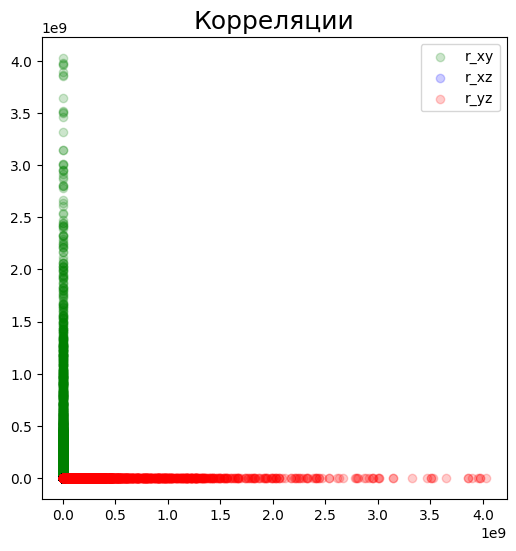

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

# plt.scatter(data.price, data.size_bytes, c='g', alpha=0.2, label='r_xy')
plt.scatter(data.price, data.user_rating, c='b', alpha=0.2, label='r_xz')
# plt.scatter(data.size_bytes, data.user_rating, c='r', alpha=0.2, label='r_yz')
plt.title('Корреляции', fontsize=18)
plt.legend()

plt.show()

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 23:55 19 октября.